Lecture: [Photogrammetry I & II (2021, Uni Bonn, Cyrill Stachniss)](https://www.youtube.com/playlist?list=PLgnQpQtFTOGRYjqjdZxTEQPZuFHQa7O7Y)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import urllib

In [2]:
import urllib
def url_to_image(url):
    # 1. download the image
    resp = urllib.request.urlopen(url)
    # 2. convert it to a NumPy array
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    # 3. read it into OpenCV format
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    # 4. convert colormap
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

In [3]:
def get_smoothed_sobel_3x3_op_x():
    return np.array([
        [  3,   0,  -3],
        [ 10,   0, -10],
        [  3,   0,  -3],
    ]) * (1/32)

def get_smoothed_sobel_3x3_op_y():
    return np.array([
        [ 3,  10,  3],
        [ 0,   0,  0],
        [-3, -10, -3],
    ]) * (1/32)

print(f'sobel operator x dim:\n{repr(get_smoothed_sobel_3x3_op_x())}')
print(f'sobel operator y dim:\n{repr(get_smoothed_sobel_3x3_op_y())}')

sobel operator x dim:
array([[ 0.09375,  0.     , -0.09375],
       [ 0.3125 ,  0.     , -0.3125 ],
       [ 0.09375,  0.     , -0.09375]])
sobel operator y dim:
array([[ 0.09375,  0.3125 ,  0.09375],
       [ 0.     ,  0.     ,  0.     ],
       [-0.09375, -0.3125 , -0.09375]])


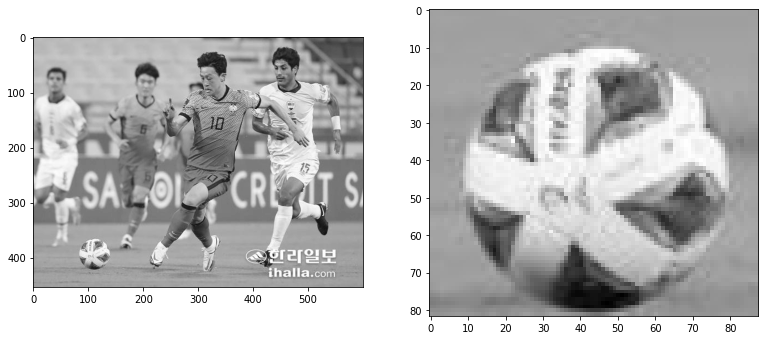

In [4]:
image_url = 'https://github.com/sju-coml/SAI-Vision-Study/blob/main/1_image_matching/img.png?raw=true'
mask_url = 'https://github.com/sju-coml/SAI-Vision-Study/blob/main/1_image_matching/mask.png?raw=true'
image = url_to_image(image_url)
mask = url_to_image(mask_url)

plt.figure(111, figsize=[13,6])
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(mask, cmap='gray')

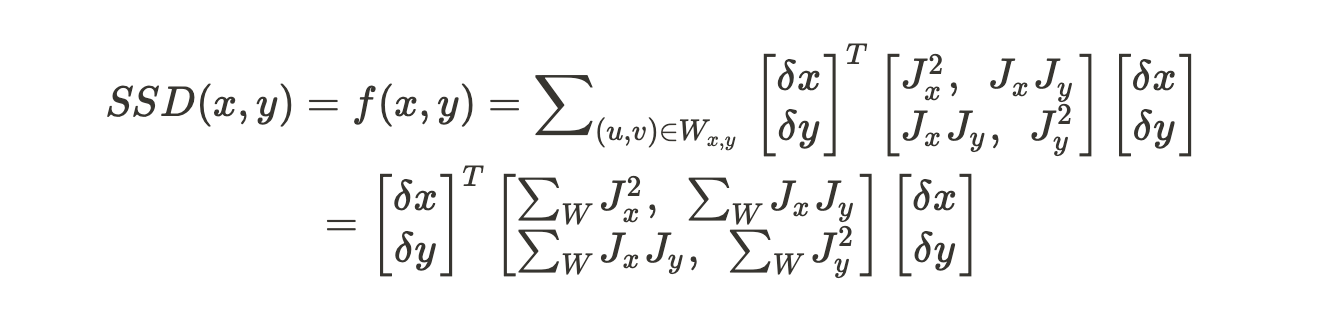

In [5]:
class Harris:

    def __init__(
        self, img, J_x, J_y
    ):
        self.img = img
        self.J_x = J_x
        self.J_y = J_y

    def SSD(
        self,
        x:int, 
        y:int,
    ):
        pass
    
    def get_structured_matrix(
        self,
        x:int, 
        y:int,
    ):
        structured_matrix = np.ones([2,2], np.float32)
        window = self.get_window(x, y)  # 3x3
        structured_matrix[0,0] = np.sum(window * (self.J_x) ** 2)
        structured_matrix[0,1] = np.sum(window * (self.J_x) * (self.J_y))
        structured_matrix[1,0] = np.sum(window * (self.J_x) * (self.J_y))
        structured_matrix[1,1] = np.sum(window * (self.J_y) ** 2)
        return structured_matrix

    def get_window(
        self,
        x:int,
        y:int,
        size:int=3,
    ):
        if size % 2: # e.g. (3x3), (5x5), ...
            i = size % 2
            return self.img[y-i:y+i+1, x-i:x+i+1]
        else: # e.g. (2x2), (4x4), ...
            raise NotImplementedError
        pass

harris = Harris(
    img=url_to_image(image_url),
    J_x=get_smoothed_sobel_3x3_op_x(),
    J_y=get_smoothed_sobel_3x3_op_x(),
)
harris.get_structured_matrix(100, 100)

array([[42.63672, 42.63672],
       [42.63672, 42.63672]], dtype=float32)

Difference Of Gaussian

In [7]:
def get_gaussian_filter():
    return np.array([
        [1/16, 1/8, 1/6],
        [1/8,  1/4, 1/8],
        [1/16, 1/8, 1/16],
    ])

1.1041666666666665